# College Football Analysis
## By David Weck

In this project, I will be analyzing college football data from 2015-2022. The goal of this project is to derive informative insights, present elegant visualizations, and eventually predict various betting metrics such as winning team, over/under, and the spread.

### Setup and Package Import

In [1]:
import cfbd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

os.chdir('..')
cwd = os.getcwd()
data_path = cwd + "\\Data\\college_football_analysis\\"

### Loading Data and Viewing Data

All of this data was sourced using the cfbd Python API. This API pulls from [collegefootballdata.com](https://collegefootballdata.com/exporter). Details on the API can be found [here](https://github.com/CFBD/cfbd-python). To see how I created the datasets below, please view `data_pull.py` on the [github repo](https://github.com/davidweck96/College-Football-Analysis) for this project.

In [2]:
adv_stats_df = pd.read_csv(data_path + 'adv_stats_df.csv')
betting_df = pd.read_csv(data_path + 'betting_df.csv')
game_results_df = pd.read_csv(data_path + 'game_results_df.csv')
recruiting_df = pd.read_csv(data_path + 'recruiting_df.csv')
returning_production_df = pd.read_csv(data_path + 'returning_production_df.csv')
talent_df = pd.read_csv(data_path + 'talent_df.csv')
teams_df = pd.read_csv(data_path + 'teams.csv')
win_prob_df = pd.read_csv(data_path + 'win_prob_df.csv')

In [3]:
print(adv_stats_df.info())
adv_stats_df.tail()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13618 entries, 0 to 13617
Data columns (total 32 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   game_id                           13618 non-null  int64  
 1   team                              13618 non-null  object 
 2   opponent                          13618 non-null  object 
 3   week                              13618 non-null  int64  
 4   offense_plays                     13618 non-null  int64  
 5   offense_drives                    13618 non-null  int64  
 6   offense_ppa                       13618 non-null  float64
 7   offense_total_ppa                 13618 non-null  float64
 8   offense_success_rate              13618 non-null  float64
 9   offense_explosiveness             13618 non-null  float64
 10  offense_power_success             13618 non-null  float64
 11  offense_stuff_rate                13618 non-null  float64
 12  offe

,game_id,team,opponent,week,offense_plays,offense_drives,offense_ppa,offense_total_ppa,offense_success_rate,offense_explosiveness,...,defense_success_rate,defense_explosiveness,defense_power_success,defense_stuff_rate,defense_line_yards,defense_line_yards_total,defense_second_level_yards,defense_second_level_yards_total,defense_open_field_yards,defense_open_field_yards_total
13613,401508851,South Dakota State,Montana State,1,50,8,0.598341,29.917065,0.640000,1.244722,...,0.415094,1.352886,0.600000,0.321429,2.082143,58.0,0.500000,14.0,0.000000,0.0
13614,401508870,Colorado Mines,Ferris State,1,53,13,-0.269881,-14.303693,0.339623,1.036877,...,0.500000,1.149530,0.666667,0.195122,2.563415,105.0,1.341463,55.0,1.560976,64.0
13615,401508870,Ferris State,Colorado Mines,1,60,11,0.302802,18.168127,0.500000,1.149530,...,0.339623,1.036877,0.250000,0.571429,0.742857,10.0,0.928571,13.0,0.714286,10.0
13616,401508871,Mount Union,North Central,1,72,10,0.132431,9.535044,0.416667,1.182994,...,0.326531,2.124815,0.400000,0.282051,2.723077,106.0,0.846154,33.0,2.641026,103.0
13617,401508871,North Central,Mount Union,1,49,11,0.305216,14.955562,0.326531,2.124815,...,0.416667,1.182994,0.750000,0.218750,2.018750,65.0,0.812500,26.0,0.343750,11.0


In [4]:
print(betting_df.info())
betting_df.tail()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6605 entries, 0 to 6604
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   game_id           6605 non-null   int64  
 1   season            6605 non-null   int64  
 2   week              6605 non-null   int64  
 3   home_team         6605 non-null   object 
 4   home_score        6605 non-null   int64  
 5   away_team         6605 non-null   object 
 6   away_score        6605 non-null   int64  
 7   provider          6605 non-null   object 
 8   spread            6598 non-null   float64
 9   formatted_spread  6605 non-null   object 
 10  spread_open       1648 non-null   float64
 11  over_under        4895 non-null   float64
 12  over_under_open   1653 non-null   float64
 13  home_moneyline    1389 non-null   float64
 14  away_moneyline    1389 non-null   float64
dtypes: float64(6), int64(5), object(4)
memory usage: 774.1+ KB
None


,game_id,season,week,home_team,home_score,away_team,away_score,provider,spread,formatted_spread,spread_open,over_under,over_under_open,home_moneyline,away_moneyline
6600,401403992,2022,3,USC,45,Fresno State,17,Bovada,-12.0,USC -12.0,-13.0,71.5,71.0,-450.0,335.0
6601,401403985,2022,3,Arizona,31,North Dakota State,28,consensus,3.0,North Dakota State -3,NaN,49.0,NaN,NaN,NaN
6602,401403986,2022,3,Arizona State,21,Eastern Michigan,30,Bovada,-20.5,Arizona State -20.5,-19.5,56.5,57.5,-1300.0,725.0
6603,401411116,2022,4,Virginia Tech,10,West Virginia,33,Bovada,2.5,West Virginia -2.5,3.0,50.0,53.0,125.0,-145.0
6604,401426334,2022,4,Georgia State,24,Coastal Carolina,41,Bovada,2.5,Coastal Carolina -2.5,1.5,63.5,64.0,110.0,-130.0


In [5]:
print(game_results_df.info())
game_results_df.tail()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5558 entries, 0 to 5557
Data columns (total 23 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   game_id             5558 non-null   int64  
 1   season              5558 non-null   int64  
 2   week                5558 non-null   int64  
 3   conference_game     5558 non-null   bool   
 4   excitement_index    5534 non-null   float64
 5   attendance          4820 non-null   float64
 6   neutral_site        5558 non-null   bool   
 7   away_conference     5558 non-null   object 
 8   away_division       5558 non-null   object 
 9   away_id             5558 non-null   int64  
 10  away_points         5555 non-null   float64
 11  away_post_win_prob  5534 non-null   float64
 12  away_postgame_elo   5555 non-null   float64
 13  away_pregame_elo    5558 non-null   float64
 14  away_team           5558 non-null   object 
 15  home_conference     5558 non-null   object 
 16  home_d

,game_id,season,week,conference_game,excitement_index,attendance,neutral_site,away_conference,away_division,away_id,...,away_pregame_elo,away_team,home_conference,home_division,home_id,home_points,home_post_win_prob,home_postgame_elo,home_pregame_elo,home_team
5553,401437008,2022,14,True,5.112175,NaN,False,American Athletic,fbs,2116,...,1647.0,UCF,American Athletic,fbs,2655,45.0,0.998380,1710.0,1675.0,Tulane
5554,401437034,2022,14,True,5.299094,NaN,False,Mountain West,fbs,278,...,1676.0,Fresno State,Mountain West,fbs,68,16.0,0.213031,1717.0,1750.0,Boise State
5555,401437031,2022,14,True,3.570047,NaN,True,Big Ten,fbs,2509,...,1622.0,Purdue,Big Ten,fbs,130,43.0,0.995153,2150.0,2144.0,Michigan
5556,401437009,2022,14,True,2.933245,NaN,True,ACC,fbs,228,...,1821.0,Clemson,ACC,fbs,153,10.0,0.001601,1554.0,1599.0,North Carolina
5557,401404145,2022,15,False,7.933517,NaN,True,American Athletic,fbs,2426,...,1462.0,Navy,FBS Independents,fbs,349,20.0,0.035239,1499.0,1494.0,Army


In [6]:
print(recruiting_df.info())
recruiting_df.tail()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1735 entries, 0 to 1734
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   year               1735 non-null   int64  
 1   recruiting_rank    1735 non-null   int64  
 2   team               1735 non-null   object 
 3   recruiting_points  1735 non-null   float64
dtypes: float64(1), int64(2), object(1)
memory usage: 54.3+ KB
None


,year,recruiting_rank,team,recruiting_points
1730,2022,185,Towson,10.06
1731,2022,186,The Citadel,9.89
1732,2022,188,Stephen F. Austin,9.44
1733,2022,189,Bucknell,8.83
1734,2022,190,Montana State,8.33


In [7]:
print(returning_production_df.info())
returning_production_df.tail()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1018 entries, 0 to 1017
Data columns (total 14 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   year                             1018 non-null   int64  
 1   team                             1018 non-null   object 
 2   returning_PPA                    1018 non-null   float64
 3   returning_passing_ppa            1018 non-null   float64
 4   returning_receiving_ppa          1018 non-null   float64
 5   returning_rushing_ppa            1018 non-null   float64
 6   returning_ppa_percent            1018 non-null   float64
 7   returning_passing_ppa_percent    1018 non-null   float64
 8   returning_receiving_ppa_percent  1018 non-null   float64
 9   returning_rushing_ppa_percent    1018 non-null   float64
 10  returning_usage                  1018 non-null   float64
 11  returning_passing_usage          1018 non-null   float64
 12  returning_receiving_

,year,team,returning_PPA,returning_passing_ppa,returning_receiving_ppa,returning_rushing_ppa,returning_ppa_percent,returning_passing_ppa_percent,returning_receiving_ppa_percent,returning_rushing_ppa_percent,returning_usage,returning_passing_usage,returning_receiving_usage,returning_rushing_usage
1013,2022,Washington,242.3,102.0,120.5,19.8,0.819,1.023,0.730,0.633,0.735,0.989,0.692,0.467
1014,2022,Washington State,18.4,-1.0,30.3,-10.9,0.079,-0.008,0.594,-0.173,0.088,0.002,0.500,0.115
1015,2022,Western Michigan,178.3,12.6,61.0,104.7,0.312,0.079,0.236,0.681,0.396,0.026,0.228,0.737
1016,2022,West Virginia,65.9,-3.9,55.1,14.6,0.185,-0.034,0.310,0.229,0.219,0.061,0.342,0.330
1017,2022,Wisconsin,205.2,71.3,42.9,91.0,0.684,0.898,0.331,0.999,0.799,0.990,0.321,0.889


In [8]:
print(talent_df.info())
talent_df.tail()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1770 entries, 0 to 1769
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   year    1770 non-null   int64  
 1   school  1770 non-null   object 
 2   talent  1770 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 41.6+ KB
None


,year,school,talent
1765,2022,South Dakota State,5.97
1766,2022,Houston Christian,5.41
1767,2022,Morehead State,4.96
1768,2022,Navy,0.00
1769,2022,Air Force,0.00


In [9]:
print(teams_df.info())
teams_df.tail()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 131 entries, 0 to 130
Data columns (total 29 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                131 non-null    int64  
 1   team              131 non-null    object 
 2   mascot            131 non-null    object 
 3   abbreviation      131 non-null    object 
 4   alt_name_1        0 non-null      float64
 5   alt_name_2        0 non-null      float64
 6   alt_name_3        0 non-null      float64
 7   classification    0 non-null      float64
 8   conference        131 non-null    object 
 9   division          80 non-null     object 
 10  color             131 non-null    object 
 11  alt_color         128 non-null    object 
 12  twitter           130 non-null    object 
 13  venue_id          131 non-null    int64  
 14  name              131 non-null    object 
 15  city              131 non-null    object 
 16  state             131 non-null    object 
 1

,id,team,mascot,abbreviation,alt_name_1,alt_name_2,alt_name_3,classification,conference,division,...,timezone,latitude,longitude,elevation,capacity,year_constructed,grass,dome,logo1,logo2
126,98,Western Kentucky,Hilltoppers,WKU,NaN,NaN,NaN,NaN,Conference USA,NaN,...,America/Chicago,36.984790,-86.459404,154.434662,22113.0,1968.0,False,False,http://a.espncdn.com/i/teamlogos/ncaa/500/98.png,http://a.espncdn.com/i/teamlogos/ncaa/500-dark...
127,2711,Western Michigan,Broncos,WMU,NaN,NaN,NaN,NaN,Mid-American,West,...,America/Detroit,42.286006,-85.600757,243.821121,30200.0,1939.0,False,False,http://a.espncdn.com/i/teamlogos/ncaa/500/2711...,http://a.espncdn.com/i/teamlogos/ncaa/500-dark...
128,277,West Virginia,Mountaineers,WVU,NaN,NaN,NaN,NaN,Big 12,NaN,...,America/New_York,39.650274,-79.955187,327.409668,60000.0,1980.0,False,False,http://a.espncdn.com/i/teamlogos/ncaa/500/277.png,http://a.espncdn.com/i/teamlogos/ncaa/500-dark...
129,275,Wisconsin,Badgers,WIS,NaN,NaN,NaN,NaN,Big Ten,West,...,America/Chicago,43.069940,-89.412694,263.604126,80321.0,1917.0,False,False,http://a.espncdn.com/i/teamlogos/ncaa/500/275.png,http://a.espncdn.com/i/teamlogos/ncaa/500-dark...
130,2751,Wyoming,Cowboys,WYO,NaN,NaN,NaN,NaN,Mountain West,Mountain,...,America/Denver,41.311610,-105.568138,2200.153564,29181.0,1950.0,False,False,http://a.espncdn.com/i/teamlogos/ncaa/500/2751...,http://a.espncdn.com/i/teamlogos/ncaa/500-dark...


In [10]:
print(win_prob_df.info())
win_prob_df.tail()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6377 entries, 0 to 6376
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   season         6377 non-null   int64  
 1   season_type    6377 non-null   object 
 2   week           6377 non-null   int64  
 3   game_id        6377 non-null   int64  
 4   home_team      6377 non-null   object 
 5   away_team      6377 non-null   object 
 6   spread         6377 non-null   float64
 7   home_win_prob  6377 non-null   float64
dtypes: float64(2), int64(3), object(3)
memory usage: 398.7+ KB
None


,season,season_type,week,game_id,home_team,away_team,spread,home_win_prob
6372,2022,regular,11,401422977,East Tennessee State,Western Carolina,-6.0,0.660
6373,2022,regular,11,401403941,Florida,South Carolina,-8.0,0.709
6374,2022,regular,11,401426604,Florida International,Florida Atlantic,15.5,0.143
6375,2022,regular,11,401426372,Georgia State,Louisiana Monroe,-13.5,0.824
6376,2022,regular,11,401411160,Georgia Tech,Miami,-2.0,0.555


### Joining DataFrames

In [11]:
game_stats_df = (game_results_df.merge(adv_stats_df
                                      , how = 'inner'
                                      , on = 'game_id'
                                      , suffixes = ('', '_y'))
                                .merge(teams_df[['team', 'mascot', 'abbreviation', 'color', 'alt_color', 'logo1', 'logo2']]
                                      , how = 'left'
                                      , on = 'team')
                                .merge(returning_production_df
                                      , how = 'left'
                                      , left_on = ['team', 'season']
                                      , right_on = ['team', 'year'])
                                .merge(recruiting_df
                                      , how = 'left'
                                      , left_on = ['team', 'season']
                                      , right_on = ['team', 'year']
                                      , suffixes = ('', '_y'))
                                .merge(talent_df
                                      , how = 'left'
                                      , left_on = ['team', 'season']
                                      , right_on = ['school', 'year']
                                      , suffixes = ('', '_y'))
                                .merge(win_prob_df
                                      , how = 'inner'
                                      , on = 'game_id'
                                      , suffixes = ('', '_y'))      
                                .merge(betting_df
                                      , how = 'inner'
                                      , on = 'game_id'
                                      , suffixes = ('', '_y'))
                )
game_stats_df.drop(game_stats_df.filter(regex='_y$').columns, axis = 1, inplace = True)
game_stats_df.drop(['season_type', 'school', 'year'], axis = 1, inplace = True)

game_stats_df['away_win_prob'] = 1 - game_stats_df['home_win_prob']
game_stats_df['home_team_win'] = np.where(game_stats_df['home_points'] > game_stats_df['away_points'], 1, 0)
game_stats_df['away_team_win'] = 1 - game_stats_df['home_team_win']
game_stats_df['team_win'] = np.where(((game_stats_df['team'] == game_stats_df['home_team']) & (game_stats_df['home_team_win'] == 1)) | ((game_stats_df['team'] == game_stats_df['away_team']) & (game_stats_df['away_team_win'] == 1)), 1, 0)
game_stats_df['total_points'] = game_stats_df['home_points'] + game_stats_df['away_points']
game_stats_df['home_spread_points'] = game_stats_df['away_points'] - game_stats_df['home_points']

In [14]:
print(game_stats_df.info())
game_stats_df.tail(10)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9960 entries, 0 to 9959
Data columns (total 91 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   game_id                           9960 non-null   int64  
 1   season                            9960 non-null   int64  
 2   week                              9960 non-null   int64  
 3   conference_game                   9960 non-null   bool   
 4   excitement_index                  9960 non-null   float64
 5   attendance                        8976 non-null   float64
 6   neutral_site                      9960 non-null   bool   
 7   away_conference                   9960 non-null   object 
 8   away_division                     9960 non-null   object 
 9   away_id                           9960 non-null   int64  
 10  away_points                       9960 non-null   float64
 11  away_post_win_prob                9960 non-null   float64
 12  away_p

,game_id,season,week,conference_game,excitement_index,attendance,neutral_site,away_conference,away_division,away_id,...,over_under,over_under_open,home_moneyline,away_moneyline,away_win_prob,home_team_win,away_team_win,team_win,total_points,home_spread_points
9950,401415258,2022,11,True,6.772543,NaN,False,Mountain West,fbs,2751,...,42.5,42.0,265.0,-330.0,0.721,0,1,0,27.0,1.0
9951,401415258,2022,11,True,6.772543,NaN,False,Mountain West,fbs,2751,...,42.5,42.0,265.0,-330.0,0.721,0,1,1,27.0,1.0
9952,401426604,2022,11,True,1.748292,NaN,False,Conference USA,fbs,2226,...,54.5,54.0,500.0,-750.0,0.857,0,1,1,59.0,45.0
9953,401426604,2022,11,True,1.748292,NaN,False,Conference USA,fbs,2226,...,54.5,54.0,500.0,-750.0,0.857,0,1,0,59.0,45.0
9954,401404109,2022,11,True,2.486414,NaN,False,Big 12,fbs,2306,...,52.5,53.5,-140.0,120.0,0.432,0,1,0,34.0,28.0
9955,401404109,2022,11,True,2.486414,NaN,False,Big 12,fbs,2306,...,52.5,53.5,-140.0,120.0,0.432,0,1,1,34.0,28.0
9956,401426371,2022,11,True,7.805655,NaN,False,Sun Belt,fbs,2572,...,48.0,54.5,-220.0,180.0,0.365,1,0,1,49.0,-3.0
9957,401426371,2022,11,True,7.805655,NaN,False,Sun Belt,fbs,2572,...,48.0,54.5,-220.0,180.0,0.365,1,0,0,49.0,-3.0
9958,401403940,2022,11,True,6.455035,NaN,False,SEC,fbs,245,...,48.5,49.5,-125.0,105.0,0.459,1,0,1,23.0,-3.0
9959,401403940,2022,11,True,6.455035,NaN,False,SEC,fbs,245,...,48.5,49.5,-125.0,105.0,0.459,1,0,0,23.0,-3.0


### Data Exploration

I will create a few plots to explore the data. I will start with some plots of general college football data over the time frame of my dataset. Then, I will work into some of the more advanced statistics that will be used for predictions.

<AxesSubplot:xlabel='season', ylabel='attendance'>

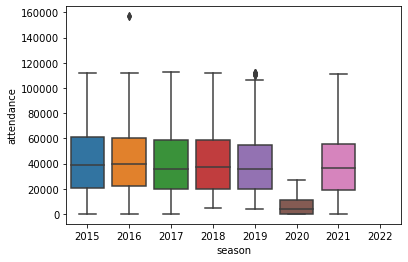

In [13]:
sns.boxplot(data = game_stats_df, x = 'season', y = 'attendance')

In this plot, we can see how attendance was affected in 2020 by the COVID19 pandemic. Attendance appears to have recovered since then. Attendance data not yet available for the 2022 season

<AxesSubplot:xlabel='season', ylabel='excitement_index'>

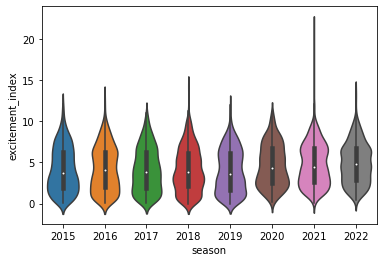

In [20]:
sns.violinplot(data = game_stats_df, x = 'season', y = 'excitement_index')

In this plot, we can see how the range and distribution of excitment has changed over the years. The excitement index does not appear to be affected by the COVID19 pandemic in 2020, despite the lower attendance numbers. The distribution of excitement index scores appears to have shifted upward in 2022. We no longer see a fatter bottom to the violin plot, as is seen in most of the years prior.